In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
기상청_데이터 = pd.read_csv('../../Data/기상청/기온.csv',encoding = 'cp949')

기상청_데이터.fillna(0, inplace=True)


In [3]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))
일별_강서_데이터= 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

일별_강서_데이터 = pd.DataFrame(일별_강서_데이터.items(), columns=['기준_날짜', '전체_건수'])
len(일별_강서_데이터)

3385613


241

In [4]:

# 휴일 데이터
휴일 = [
    {"날짜": "2023-05-05"},
    {"날짜": "2023-05-29"},
    {"날짜": "2023-06-06"},
    {"날짜": "2023-08-15"},
    {"날짜": "2023-09-28"},
    {"날짜": "2023-09-29"},
    {"날짜": "2023-10-02"},
    {"날짜": "2023-10-03"},
    {"날짜": "2023-10-09"},
    {"날짜": "2023-12-25"},
    {"날짜": "2024-01-01"},
    {"날짜": "2024-02-09"},
    {"날짜": "2024-02-12"},
    {"날짜": "2024-03-01"},
]
# 주말과 휴일을 분류하는 함수 정의
def classify_weekend_and_holidays(df, holidays):
    # '일시' 열을 datetime 형식으로 변환
    df['일시'] = pd.to_datetime(df['일시'])
    
    # 주말(토요일: 5, 일요일: 6)인지 여부를 나타내는 열 추가
    df['요일'] = df['일시'].dt.dayofweek  # 0: 월요일, 1: 화요일, ..., 6: 일요일
    df['주말'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)  # 토요일(5) 또는 일요일(6)이면 주말로 분류
    
    # 휴일인지 여부를 나타내는 열 추가
    df['휴일'] = df['일시'].apply(lambda x: 1 if str(x.date()) in [h['날짜'] for h in holidays] else 0)
    
    # 주말과 휴일으로 데이터 분리
    주말_df = df[(df['주말'] == 1) | (df['휴일'] == 1)]
    주중_df = df[(df['주말'] == 0) & (df['휴일'] == 0)]
    
    return 주말_df, 주중_df

# 함수 호출
기상청_주말_데이터, 기상청_주중_데이터 = classify_weekend_and_holidays(기상청_데이터, 휴일)
기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)
len(기상청_주중_데이터)


C:\Users\DW\AppData\Local\Temp\ipykernel_15092\663732242.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)


246

In [5]:
# 기상청_주중_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])

# 일별_강서_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
일별_강서_데이터['기준_날짜'] = pd.to_datetime(일별_강서_데이터['기준_날짜'])

# 두 데이터프레임의 '기준_날짜' 값을 비교하여 있는 값과 없는 값을 구분
공통_날짜 = pd.merge(기상청_주중_데이터, 일별_강서_데이터, on='기준_날짜', how='inner')['기준_날짜']
기상청_누락_날짜 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']
강서_누락_날짜 = 일별_강서_데이터[~일별_강서_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']

print("기상청 데이터에만 있는 날짜:")
print(기상청_누락_날짜)
기상청_주중_데이터 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(기상청_누락_날짜)]
기상청_주중_데이터 = 기상청_주중_데이터.rename(columns={'평균기온(°C)': '평균기온', '최고기온(°C)': '최고기온','최저기온(°C)': '최저기온'})



기상청 데이터에만 있는 날짜:
276   2024-01-02
310   2024-02-05
311   2024-02-06
324   2024-02-19
325   2024-02-20
Name: 기준_날짜, dtype: datetime64[ns]


C:\Users\DW\AppData\Local\Temp\ipykernel_15092\985266899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])


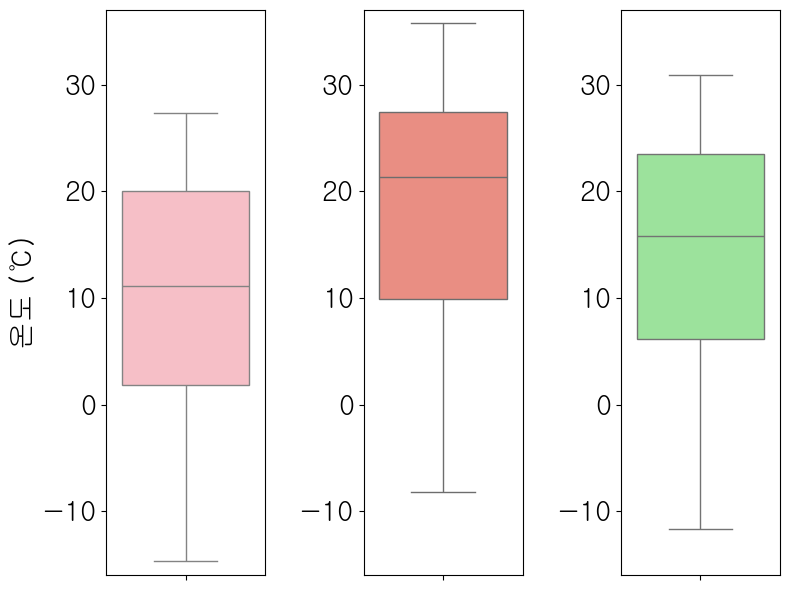

In [6]:

# 이상치를 보기 위해 기상 데이터와 강수량, 평균 기온, 초미세먼지를 병합
기상청 = pd.concat([기상청_주중_데이터[['최저기온', '최고기온',  '평균기온']], 일별_강서_데이터['전체_건수']], axis=1)

# Boxplot 그리기
plt.figure(figsize=(8, 6))


# 초미세먼지의 Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=기상청['최저기온'], color='lightpink')
plt.ylabel('온도 (℃)',fontdict={'fontsize': 20,'fontweight':'bold'})
plt.ylim([-16,37])
plt.gca().yaxis.label.set_fontweight('bold')

plt.tick_params(axis='y', labelsize=20)
# 강수량의 Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=기상청['최고기온'], color='salmon')
# plt.title('최고기온')
plt.ylim([-16,37])
plt.ylabel(' ')
plt.gca().yaxis.label.set_fontweight('bold')
plt.tick_params(axis='y', labelsize=20)
# 평균 기온의 Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=기상청['평균기온'], color='lightgreen')
plt.ylabel(' ')
# plt.title('평균기온')
plt.ylim([-16,37])
plt.tight_layout()
plt.gca().yaxis.label.set_fontweight('bold')

plt.tick_params(axis='y', labelsize=20)



plt.savefig('기온박스플롯.png',dpi=300)
plt.show()



# 기온,강수량과 이용량과의 관계 EDA


In [7]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')
강서_데이터3 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_주말_휴일.csv',encoding='utf-8')
강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2,강서_데이터3], ignore_index=True)
print(len(강서_데이터))
일별_강서_데이터= 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

일별_강서_데이터

4426566


기준_날짜
2023-04-01    12380
2023-04-02    11727
2023-04-03    16354
2023-04-04    13309
2023-04-05     2191
              ...  
2024-03-27    15206
2024-03-28     9280
2024-03-29    10772
2024-03-30    10151
2024-03-31    10093
Name: 전체_건수, Length: 358, dtype: int64

In [8]:
기상청_데이터 = pd. read_csv('../../Data/기상청/기온강수량미세먼지2.csv',encoding='cp949')
기상청_데이터.fillna(0, inplace=True)
기상청_데이터['일시'] = 기상청_데이터['기준_날짜']

기상청_데이터.drop(기상청_데이터.index[-1], inplace=True)


기상청_데이터['기준_날짜'] = pd.to_datetime(기상청_데이터['기준_날짜'])

In [9]:
일별_강서_데이터 = pd.DataFrame(일별_강서_데이터.items(), columns=['기준_날짜', '전체_건수'])
일별_강서_데이터['기준_날짜'] = pd.to_datetime(일별_강서_데이터['기준_날짜'])


In [10]:
전체_데이터 =  pd.merge(기상청_데이터, 일별_강서_데이터, left_on='기준_날짜', right_on='기준_날짜', how='left')

전체_데이터['기준_날짜'] = 전체_데이터['기준_날짜'].dt.strftime('%Y-%m-%d')

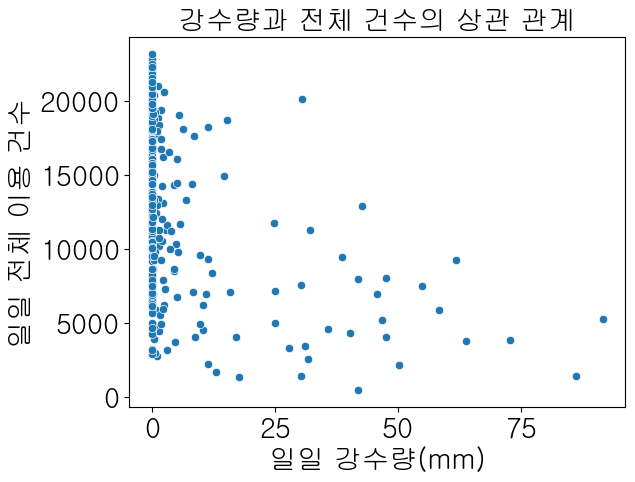

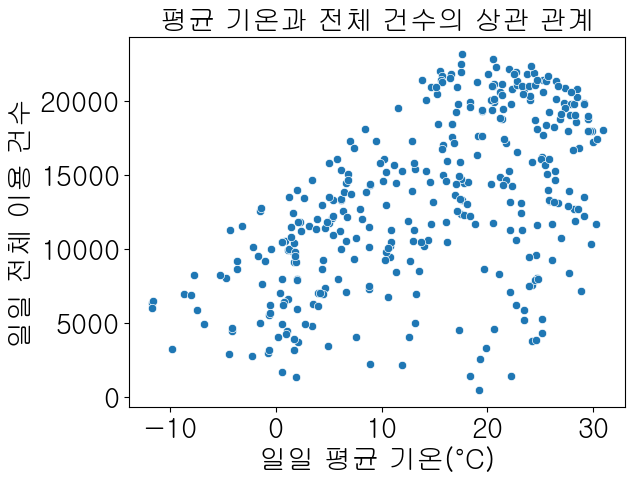

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='일강수량(mm)', y='전체_건수', data=전체_데이터)
plt.title("강수량과 전체 건수의 상관 관계",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.xlabel("일일 강수량(mm)",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.ylabel("일일 전체 이용 건수",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.gca().yaxis.label.set_fontweight('bold')
plt.tick_params(axis='y', labelsize=20)
plt.gca().xaxis.label.set_fontweight('bold')
plt.tick_params(axis='x', labelsize=20)
plt.savefig('figure/이용량-강수량 관계 비교.png',dpi=300)
plt.show()

# 평균 기온과 전체 건수의 시각화
sns.scatterplot(x='평균기온(°C)', y='전체_건수', data=전체_데이터)
plt.title("평균 기온과 전체 건수의 상관 관계",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.xlabel("일일 평균 기온(°C)",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.ylabel("일일 전체 이용 건수",fontdict={'fontsize': 20,'fontweight':'bold'})
plt.gca().yaxis.label.set_fontweight('bold')
plt.tick_params(axis='y', labelsize=20)
plt.gca().xaxis.label.set_fontweight('bold')
plt.tick_params(axis='x', labelsize=20)
plt.savefig('figure/이용량-기온 관계 비교.png',dpi=300)
plt.show()